<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# DEPLOYMENT

**Welcome to deployment section! In this section of the course, we will go through the entire deployment process, starting as if you had to create a servicable model from scratch, then deploy it for others to use, either through API or a web form.**

# Data

For this example we use the very common data set: [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is about flowers. 

From Wikipedia:
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv("../DATA/iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Processing

### Features and Target

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
X = iris.drop('species',axis=1)
y = iris['species']

In [6]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
# Lots of ways to one hot encode
# https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn
# https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [8]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
scaled_X_train = scaler.transform(X_train)

In [14]:
scaled_X_test = scaler.transform(X_test)

## Model


### Creating the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(patience=10)

In [19]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 1s 7ms/sample - loss: 1.1243 - accuracy: 0.3250 - val_loss: 1.1015 - val_accuracy: 0.4000
Epoch 2/300
120/120 [==============================] - 0s 200us/sample - loss: 1.1181 - accuracy: 0.3167 - val_loss: 1.0980 - val_accuracy: 0.3667
Epoch 3/300
120/120 [==============================] - 0s 158us/sample - loss: 1.1127 - accuracy: 0.3000 - val_loss: 1.0945 - val_accuracy: 0.3667
Epoch 4/300
120/120 [==============================] - 0s 192us/sample - loss: 1.1071 - accuracy: 0.3000 - val_loss: 1.0909 - val_accuracy: 0.4000
Epoch 5/300
120/120 [==============================] - 0s 200us/sample - loss: 1.1018 - accuracy: 0.3000 - val_loss: 1.0875 - val_accuracy: 0.4000
Epoch 6/300
120/120 [==============================] - 0s 167us/sample - loss: 1.0963 - accuracy: 0.2833 - val_loss: 1.0840 - val_accuracy: 0.4333
Epoch 7/300
120/120 [==============================] - 0s 200us/sample - lo

120/120 [==============================] - 0s 150us/sample - loss: 0.8018 - accuracy: 0.6833 - val_loss: 0.8509 - val_accuracy: 0.6000
Epoch 112/300
120/120 [==============================] - 0s 157us/sample - loss: 0.7992 - accuracy: 0.6833 - val_loss: 0.8486 - val_accuracy: 0.6000
Epoch 113/300
120/120 [==============================] - 0s 158us/sample - loss: 0.7967 - accuracy: 0.6833 - val_loss: 0.8464 - val_accuracy: 0.6000
Epoch 114/300
120/120 [==============================] - 0s 150us/sample - loss: 0.7942 - accuracy: 0.6833 - val_loss: 0.8440 - val_accuracy: 0.6000
Epoch 115/300
120/120 [==============================] - 0s 158us/sample - loss: 0.7919 - accuracy: 0.6833 - val_loss: 0.8421 - val_accuracy: 0.6000
Epoch 116/300
120/120 [==============================] - 0s 150us/sample - loss: 0.7892 - accuracy: 0.6833 - val_loss: 0.8399 - val_accuracy: 0.6000
Epoch 117/300
120/120 [==============================] - 0s 142us/sample - loss: 0.7869 - accuracy: 0.6833 - val_loss: 0

120/120 [==============================] - 0s 150us/sample - loss: 0.6871 - accuracy: 0.6833 - val_loss: 0.7448 - val_accuracy: 0.6000
Epoch 167/300
120/120 [==============================] - 0s 150us/sample - loss: 0.6855 - accuracy: 0.6833 - val_loss: 0.7430 - val_accuracy: 0.6000
Epoch 168/300
120/120 [==============================] - 0s 150us/sample - loss: 0.6838 - accuracy: 0.6833 - val_loss: 0.7413 - val_accuracy: 0.6000
Epoch 169/300
120/120 [==============================] - 0s 150us/sample - loss: 0.6823 - accuracy: 0.6833 - val_loss: 0.7395 - val_accuracy: 0.6000
Epoch 170/300
120/120 [==============================] - 0s 150us/sample - loss: 0.6806 - accuracy: 0.6833 - val_loss: 0.7379 - val_accuracy: 0.6000
Epoch 171/300
120/120 [==============================] - 0s 150us/sample - loss: 0.6790 - accuracy: 0.6833 - val_loss: 0.7362 - val_accuracy: 0.6000
Epoch 172/300
120/120 [==============================] - 0s 158us/sample - loss: 0.6774 - accuracy: 0.6833 - val_loss: 0

120/120 [==============================] - 0s 150us/sample - loss: 0.6115 - accuracy: 0.6833 - val_loss: 0.6658 - val_accuracy: 0.6000
Epoch 222/300
120/120 [==============================] - 0s 150us/sample - loss: 0.6104 - accuracy: 0.6833 - val_loss: 0.6647 - val_accuracy: 0.6000
Epoch 223/300
120/120 [==============================] - 0s 150us/sample - loss: 0.6093 - accuracy: 0.6833 - val_loss: 0.6635 - val_accuracy: 0.6000
Epoch 224/300
120/120 [==============================] - 0s 150us/sample - loss: 0.6082 - accuracy: 0.6833 - val_loss: 0.6622 - val_accuracy: 0.6000
Epoch 225/300
120/120 [==============================] - 0s 150us/sample - loss: 0.6071 - accuracy: 0.6833 - val_loss: 0.6611 - val_accuracy: 0.6000
Epoch 226/300
120/120 [==============================] - 0s 150us/sample - loss: 0.6060 - accuracy: 0.6833 - val_loss: 0.6600 - val_accuracy: 0.6000
Epoch 227/300
120/120 [==============================] - 0s 142us/sample - loss: 0.6048 - accuracy: 0.6833 - val_loss: 0

120/120 [==============================] - 0s 150us/sample - loss: 0.5582 - accuracy: 0.7000 - val_loss: 0.6089 - val_accuracy: 0.6333
Epoch 277/300
120/120 [==============================] - 0s 142us/sample - loss: 0.5574 - accuracy: 0.7000 - val_loss: 0.6076 - val_accuracy: 0.6333
Epoch 278/300
120/120 [==============================] - 0s 150us/sample - loss: 0.5566 - accuracy: 0.7000 - val_loss: 0.6067 - val_accuracy: 0.6333
Epoch 279/300
120/120 [==============================] - 0s 142us/sample - loss: 0.5557 - accuracy: 0.7000 - val_loss: 0.6057 - val_accuracy: 0.6333
Epoch 280/300
120/120 [==============================] - 0s 143us/sample - loss: 0.5549 - accuracy: 0.7000 - val_loss: 0.6048 - val_accuracy: 0.6333
Epoch 281/300
120/120 [==============================] - 0s 142us/sample - loss: 0.5541 - accuracy: 0.7000 - val_loss: 0.6035 - val_accuracy: 0.6333
Epoch 282/300
120/120 [==============================] - 0s 142us/sample - loss: 0.5532 - accuracy: 0.7000 - val_loss: 0

## Model Evaluation

In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.124315,0.325000,1.101527,0.400000
1,1.118055,0.316667,1.098044,0.366667
2,1.112693,0.300000,1.094468,0.366667
3,1.107052,0.300000,1.090874,0.400000
4,1.101796,0.300000,1.087489,0.400000
...,...,...,...,...
295,0.542123,0.708333,0.590314,0.633333
296,0.541408,0.700000,0.589807,0.633333
297,0.540605,0.708333,0.589002,0.633333
298,0.539951,0.708333,0.587918,0.633333


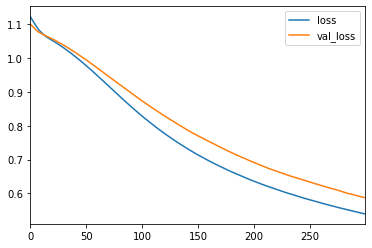

In [22]:
metrics[['loss','val_loss']].plot()

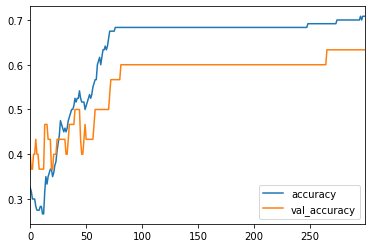

In [23]:
metrics[['accuracy','val_accuracy']].plot()

In [24]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.5871963500976562, 0.6333333]

## Ready Model for Deployment

In [25]:
epochs = len(metrics)

In [26]:
scaled_X = scaler.fit_transform(X)

In [27]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(scaled_X,y,epochs=epochs)

Train on 150 samples
Epoch 1/300
150/150 [==============================] - 0s 2ms/sample - loss: 1.3862 - accuracy: 0.3333
Epoch 2/300
150/150 [==============================] - 0s 100us/sample - loss: 1.3601 - accuracy: 0.3333
Epoch 3/300
150/150 [==============================] - 0s 107us/sample - loss: 1.3397 - accuracy: 0.3333
Epoch 4/300
150/150 [==============================] - 0s 93us/sample - loss: 1.3139 - accuracy: 0.3400
Epoch 5/300
150/150 [==============================] - 0s 100us/sample - loss: 1.2910 - accuracy: 0.3467
Epoch 6/300
150/150 [==============================] - 0s 100us/sample - loss: 1.2682 - accuracy: 0.3467
Epoch 7/300
150/150 [==============================] - 0s 93us/sample - loss: 1.2500 - accuracy: 0.3533
Epoch 8/300
150/150 [==============================] - 0s 93us/sample - loss: 1.2290 - accuracy: 0.3867
Epoch 9/300
150/150 [==============================] - 0s 100us/sample - loss: 1.2097 - accuracy: 0.4333
Epoch 10/300
150/150 [=================

150/150 [==============================] - 0s 87us/sample - loss: 0.5815 - accuracy: 0.7133
Epoch 156/300
150/150 [==============================] - 0s 93us/sample - loss: 0.5790 - accuracy: 0.7133
Epoch 157/300
150/150 [==============================] - 0s 87us/sample - loss: 0.5767 - accuracy: 0.7133
Epoch 158/300
150/150 [==============================] - 0s 87us/sample - loss: 0.5744 - accuracy: 0.7133
Epoch 159/300
150/150 [==============================] - 0s 80us/sample - loss: 0.5721 - accuracy: 0.7200
Epoch 160/300
150/150 [==============================] - 0s 87us/sample - loss: 0.5698 - accuracy: 0.7200
Epoch 161/300
150/150 [==============================] - 0s 80us/sample - loss: 0.5675 - accuracy: 0.7200
Epoch 162/300
150/150 [==============================] - 0s 87us/sample - loss: 0.5653 - accuracy: 0.7200
Epoch 163/300
150/150 [==============================] - 0s 80us/sample - loss: 0.5631 - accuracy: 0.7200
Epoch 164/300
150/150 [==============================] - 0s 

In [29]:
model.save("final_iris_model.h5")

### Saving Scaler

In [30]:
import joblib

In [31]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

## Predicting a Single New Flower

In [32]:
from tensorflow.keras.models import load_model

In [33]:
flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

In [34]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [35]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [36]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [37]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]
                    

In [41]:
return_prediction(flower_model,flower_scaler,flower_example)

'setosa'

# CODE FOR DEPLOYMENT:

In [42]:
from tensorflow.keras.models import load_model
import joblib


flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]

In [ ]:
flower_example = {
"sepal_length":5.1,
"sepal_width":3.5,
"petal_length":1.4,
"petal_width":0.2
}